In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, KFold, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import roc_auc_score, precision_score, confusion_matrix
from scipy import stats
from sklearn.inspection import PartialDependenceDisplay
!pip install shap
import shap
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 19.0 MB/s eta 0:00:00


# New Section

In [3]:
data=pd.read_csv(r"/content/Bank Customer Churn Prediction.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [9]:
list=["gender","country","credit_card","products_number","active_member","churn"]
for i in list:
  print(data[i].value_counts())

gender
Male      5457
Female    4543
Name: count, dtype: int64
country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
credit_card
1    7055
0    2945
Name: count, dtype: int64
products_number
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
active_member
1    5151
0    4849
Name: count, dtype: int64
churn
0    7963
1    2037
Name: count, dtype: int64


<Figure size 1000x1500 with 0 Axes>

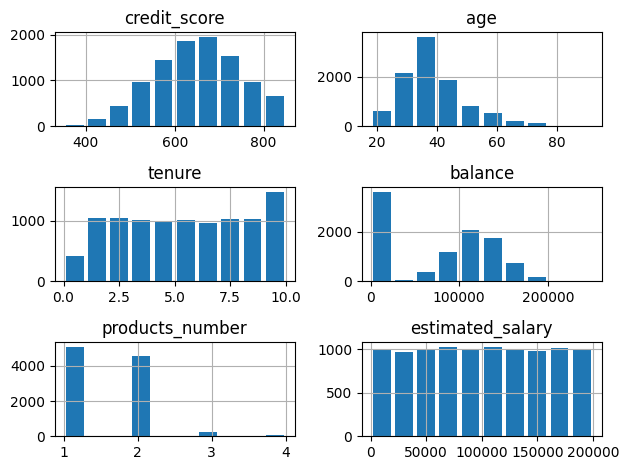

In [10]:
plt.figure(figsize=(10,15))
data[['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']].hist(rwidth=0.8)
plt.tight_layout()

<Axes: xlabel='country', ylabel='count'>

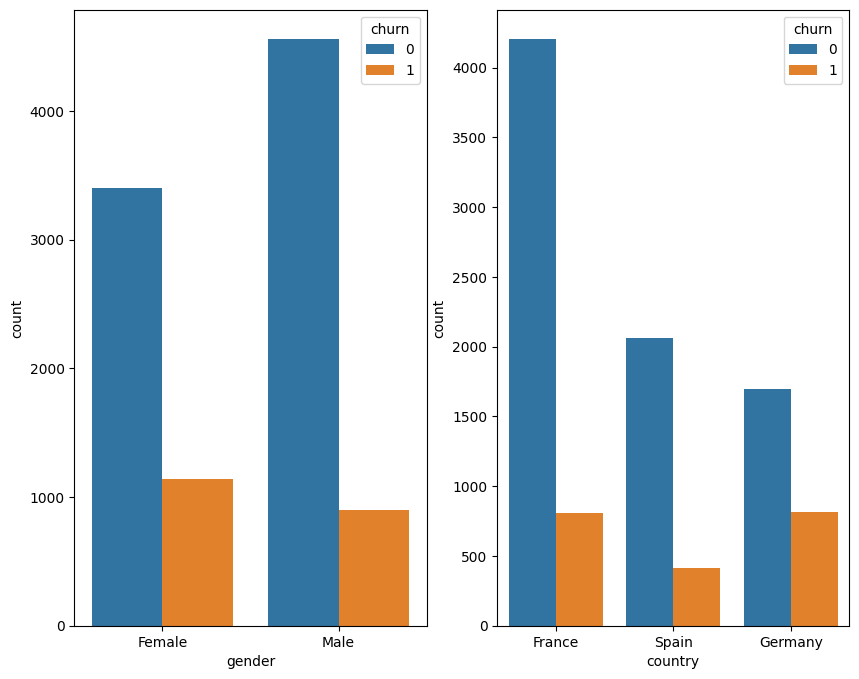

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 8))
sns.countplot(x='gender', hue='churn', data=data, ax=ax1)
sns.countplot(x='country', hue='churn', data=data, ax=ax2)


Point-biserial is specifically useful in situations where you want to measure the relationship between a binary outcome (like customer churn, presence of a disease, etc.) and a continuous predictor (like age, income, etc.).
Pearson is more general for exploring relationships between continuous variables.

In [13]:
columns=['credit_score','age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn']
point_biserial_corr = {}

for col in columns:
   corr_value,p_value= stats.pointbiserialr(data[col],data["churn"])
   point_biserial_corr[col] = corr_value

sorted_corr=sorted(point_biserial_corr.items(),key=lambda x:x[1],reverse=True)

for i in sorted_corr:
 print(f"{i[0]}: {i[1]:.2f}")

churn: 1.00
age: 0.29
balance: 0.12
estimated_salary: 0.01
credit_card: -0.01
tenure: -0.01
credit_score: -0.03
products_number: -0.05
active_member: -0.16


Feature Enginnering



In [14]:
data["bal_to_sal"]=data["balance"]/data["estimated_salary"]
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,bal_to_sal
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055


In [15]:
x=data.drop("churn",axis=1)
y=data["churn"]

In [16]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [17]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
  def __init__(self,attribute_names):
    self.attribute_names=attribute_names
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    return X[self.attribute_names]

In [18]:
num_pipeline=Pipeline([
    ("select_num",DataFrameSelector(['credit_score','age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary','bal_to_sal'])),
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
                          ])

In [19]:
X_train_transformed = num_pipeline.fit_transform(X_train)
X_test_transformed = num_pipeline.transform(X_test)

In [20]:
cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(['country', 'gender'])),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse_output=False))
])

In [21]:
X_train_cat = cat_pipeline.fit_transform(X_train)
X_test_cat = cat_pipeline.transform(X_test)

In [22]:
cats=cat_pipeline.named_steps["encoder"].categories_
cats

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [23]:
from sklearn.compose import ColumnTransformer

pre_process = ColumnTransformer(transformers=[
    ("num_pipeline", num_pipeline, ['credit_score', 'age', 'tenure', 'balance',
                                    'products_number', 'credit_card', 'active_member', 'estimated_salary','bal_to_sal']),
    ("cat_pipeline", cat_pipeline, ['country', 'gender'])
])


In [24]:
X_train_transformed = pre_process.fit_transform(X_train)
X_test_transformed = pre_process.transform(X_test)

In [27]:
print("class distribution before smote:", np.bincount(y_train))

class distribution before smote: [6356 1644]


In [28]:
smote = SMOTE(random_state=28)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

In [29]:
print("New class distribution after smote:", np.bincount(y_train_resampled))

New class distribution after smote: [6356 6356]


In [30]:
kn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=4)
et = ExtraTreesClassifier(random_state=4)
ab = AdaBoostClassifier(random_state=4)
dt = DecisionTreeClassifier(random_state=4)
xg = XGBClassifier(random_state=4)
gbm = GradientBoostingClassifier(random_state=4)
nb = GaussianNB()
lr = LogisticRegression(random_state=4)
mlp = MLPClassifier(random_state=4)

In [31]:
 kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=4)

In [32]:
y_prob = cross_val_predict(kn, X_train_resampled, y_train_resampled, cv=10, method="predict_proba")
roc_auc = roc_auc_score(y_train_resampled, y_prob[:, 1])
print("roc_auc_score:", roc_auc)

roc_auc_score: 0.9315365089640428


In [33]:
y_prob=cross_val_predict(rf,X_train_resampled,y_train_resampled,cv=10,method="predict_proba")
roc_auc=roc_auc_score(y_train_resampled,y_prob[:,1])
print("roc_auc_score:",roc_auc)

roc_auc_score: 0.9664516731414567


In [34]:
y_proba = cross_val_predict(et, X_train_resampled, y_train_resampled, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y_train_resampled, y_proba[:, 1])
print("Cross-Validation ROC AUC Score for XT:", roc_auc)

Cross-Validation ROC AUC Score for XT: 0.9766947163891464


In [35]:
y_proba = cross_val_predict(ab, X_train_resampled, y_train_resampled, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y_train_resampled, y_proba[:, 1])
print("Cross-Validation ROC AUC Score for AB:", roc_auc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Cross-Validation ROC AUC Score for AB: 0.8986986870084253


In [36]:
y_proba = cross_val_predict(dt, X_train_resampled, y_train_resampled, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y_train_resampled, y_proba[:, 1])
print("Cross-Validation ROC AUC Score for DT:", roc_auc)

Cross-Validation ROC AUC Score for DT: 0.8392857142857143


In [37]:
y_proba = cross_val_predict(xg, X_train_resampled, y_train_resampled, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y_train_resampled, y_proba[:, 1])
print("Cross-Validation ROC AUC Score for XG:", roc_auc)

Cross-Validation ROC AUC Score for XG: 0.9567049696802394


In [38]:
y_proba = cross_val_predict(gbm, X_train_resampled, y_train_resampled, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y_train_resampled, y_proba[:, 1])
print("Cross-Validation ROC AUC Score for GBM:", roc_auc)

Cross-Validation ROC AUC Score for GBM: 0.9383585417127902


In [39]:
y_proba = cross_val_predict(nb, X_train_resampled, y_train_resampled, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y_train_resampled, y_proba[:, 1])
print("Cross-Validation ROC AUC Score for NB:", roc_auc)

Cross-Validation ROC AUC Score for NB: 0.7865802534019877


In [40]:
y_proba = cross_val_predict(lr, X_train_resampled, y_train_resampled, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y_train_resampled, y_proba[:, 1])
print("Cross-Validation ROC AUC Score for LR:", roc_auc)

Cross-Validation ROC AUC Score for LR: 0.7763426558692331


In [41]:
param_grid_rf = {
    "n_estimators": [50, 100],
    "max_depth": [None, 5],
    "random_state": [42]
}

param_grid_et = {
    "n_estimators": [50, 100],
    "max_depth": [None, 5],
    "random_state": [42]
}

param_grid_xg = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'random_state': [42]
}
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]  # 'auto' is removed
}

# Create a dictionary with model names as keys and hyperparameter grids as values
models_params = {
    "RandomForest": (rf, param_grid_rf),
    "ExtraTree": (et, param_grid_et),
    "XGBoost": (xg, param_grid_xg),
    "KNeighbors": (kn, param_grid_knn),
    "AdaBoost": (ab, param_grid_ada),
    "GradientBoosting": (gbm, param_grid_gb)
}

In [42]:
from sklearn.model_selection import GridSearchCV

best_models = {}

for model_name, (model, param_grid) in models_params.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for RandomForest: {'max_depth': None, 'n_estimators': 100, 'random_state': 42}
Best score for RandomForest: 0.9044262756125715
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for ExtraTree: {'max_depth': None, 'n_estimators': 100, 'random_state': 42}
Best score for ExtraTree: 0.9190568639541505
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 42}
Best score for XGBoost: 0.8739863180981841
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters for KNeighbors: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best score for KNeighbors: 0.8854635284901426
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters for AdaBoost: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
Best score for AdaBoost: 0.8573880011249468
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for GradientBoosting: {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 1.0}
Best score for GradientBoosting: 0.9019141729986172


In [43]:
fr = RandomForestClassifier(n_estimators = 100, max_depth = None, random_state = 42)
et = ExtraTreesClassifier(n_estimators = 100, max_depth = None, random_state = 42)
gb = GradientBoostingClassifier(
    learning_rate=0.2,  # Optimal learning rate
    max_depth=7,        # Optimal max depth
    max_features='sqrt',# Optimal max features
    n_estimators=200,   # Optimal number of estimators
    subsample=0.8,      # Optimal subsample ratio
    random_state=42     # Setting random state for reproducibility
)

classifiers = [fr, et, gb]

In [44]:
for classifier in classifiers:
    y_proba = cross_val_predict(estimator=classifier, X=X_train_resampled, y=y_train_resampled, cv=kf, method="predict_proba")

    # Compute ROC AUC score across all folds
    score = roc_auc_score(y_train_resampled, y_proba[:, 1])

    print(f"Classifier: {classifier}")
    print(f"ROC AUC score: {score}")
    print("\n")

Classifier: RandomForestClassifier(random_state=42)
ROC AUC score: 0.9647004054780328


Classifier: ExtraTreesClassifier(random_state=42)
ROC AUC score: 0.9746859530456597


Classifier: GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_features='sqrt',
                           n_estimators=200, random_state=42, subsample=0.8)
ROC AUC score: 0.9628142326037132




In [45]:
X_t, X_h, y_t, y_h = train_test_split(X_train_resampled, y_train_resampled, test_size = 0.05, random_state = 42)

In [46]:
et.fit(X_t, y_t)

ExtraTreesClassifier(random_state=42)

In [47]:
y_proba_train = et.predict_proba(X_t)
train_roc_auc = roc_auc_score(y_t, y_proba_train[:, 1])
train_precision = precision_score(y_t, et.predict(X_t))

y_proba_holdout = et.predict_proba(X_h)
holdout_roc_auc = roc_auc_score(y_h, y_proba_holdout[:, 1])
holdout_precision = precision_score(y_h, et.predict(X_h))

print(f"Train ROC AUC: {train_roc_auc}")
print(f"Train Precision: {train_precision}")
print(f"Holdout ROC AUC: {holdout_roc_auc}")
print(f"Holdout Precision: {holdout_precision}")

Train ROC AUC: 1.0
Train Precision: 1.0
Holdout ROC AUC: 0.9730462220200001
Holdout Precision: 0.9262820512820513


In [48]:
cm = confusion_matrix(y_h, et.predict(X_h))
print("Confusion Matrix:")
print(cm)

# Interpret the matrix
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

Confusion Matrix:
[[300  23]
 [ 24 289]]
True Positives: 289
True Negatives: 300
False Positives: 23
False Negatives: 24


Implement Stacking and Blending

In [49]:
fitted_classifiers = []
for classifier in classifiers:
    classifier.fit(X_t, y_t)
    fitted_classifiers.append(classifier)

In [50]:
predictions_subset2 = []
for classifier in fitted_classifiers:
    predictions = classifier.predict(X_h)
    predictions_subset2.append(predictions)

In [51]:
#Create a feature matrix of all the predictions by the models
blending_feature_matrix = np.column_stack(predictions_subset2)

In [52]:
# Train a blending model (meta-model) on the blending feature matrix and true labels of subset2
blending_model = ExtraTreesClassifier(n_estimators = 100, max_depth = None, random_state = 42)
blending_model.fit(blending_feature_matrix, y_h)
blending_predictions = blending_model.predict(blending_feature_matrix)

In [53]:
blending_roc_auc = roc_auc_score(y_h, blending_predictions)
blending_precision = precision_score(y_h, blending_predictions)
print("ROC AUC Score for Blending Model:", blending_roc_auc)
print("Precision for Blending Model:", blending_precision)

ROC AUC Score for Blending Model: 0.9276056142988555
Precision for Blending Model: 0.9292604501607717


**SHAP**

In [54]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'bal_to_sal'],
      dtype='object')

In [57]:
features_importance = et.feature_importances_
feature_names = pd.Series(['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'France', 'Germany', 'Spain', 'Female', 'Male','bal_to_sal'])

features_importance = pd.Series(features_importance)
df = pd.concat([feature_names, features_importance], axis=1)
df

,0,1
0,credit_score,0.088134
1,age,0.193968
2,tenure,0.088452
3,balance,0.104893
4,products_number,0.151439
5,credit_card,0.023697
6,active_member,0.043475
7,estimated_salary,0.088051
8,France,0.067392
9,Germany,0.029634


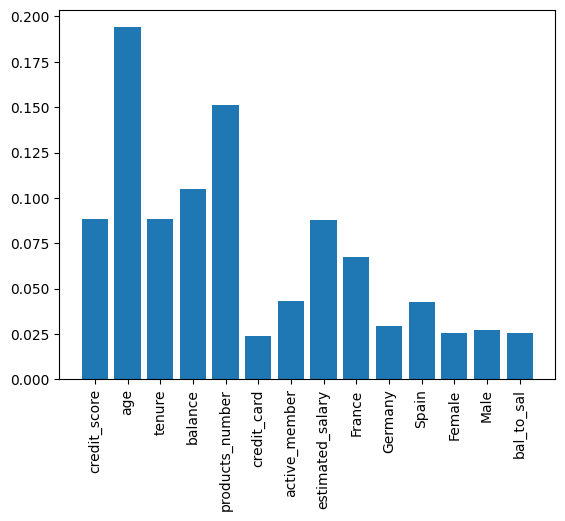

In [58]:
plt.bar(feature_names, features_importance*1)
plt.xticks(rotation=90)
plt.show()

X1 - Age
X4 - products_number

*   These plots help explain how features x1 and x4 individually and together influence the model's predictions. The 2D contour plot suggests that the model considers the interaction between these two features when making predictions.



*  The black tick marks at the bottom of each
plot indicate the actual data points, giving context to which regions have more or fewer data points.





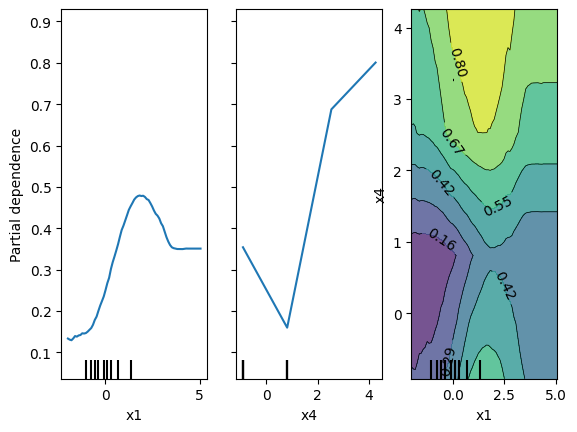

In [61]:
PartialDependenceDisplay.from_estimator(et, X_test_transformed, [1, 4, (1, 4)])

In [63]:

explainer = shap.TreeExplainer(et)
shap_values = explainer.shap_values(X_h)

shap_values_class = shap_values[1]  # using index 1 for the positive class


In [68]:
print(shap_values.shape)  # Checking the shape


(636, 14, 2)


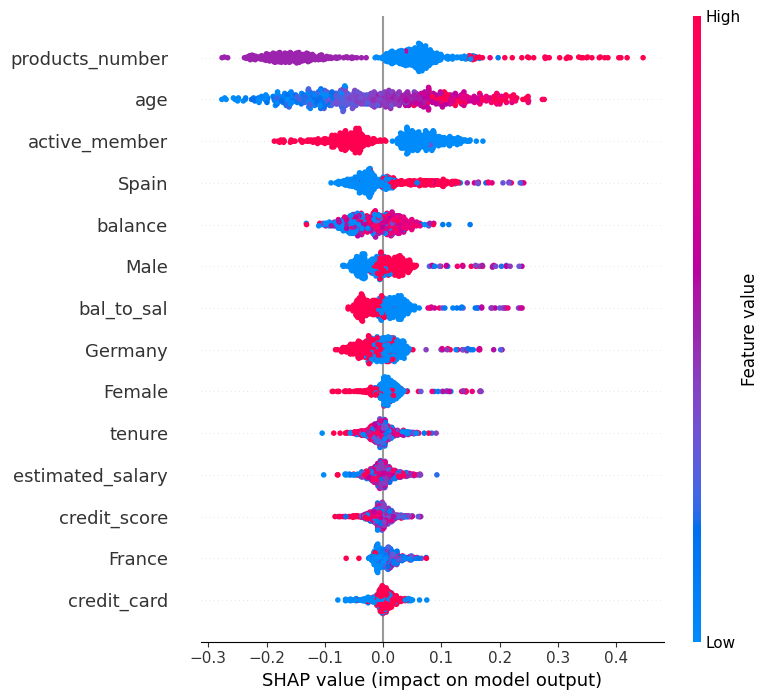

In [69]:

shap_values_class_1 = shap_values[:, :, 1]
shap.summary_plot(shap_values_class_1, X_h, feature_names=feature_names)
